<a href="https://colab.research.google.com/github/borisdautovic/PPPO_IT47-2021-Boris-Dautovic/blob/main/PPPOIT47_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principi prezentacije i prepoznavanja oblika 2024/2025**

**Boris Dautović IT 47/2021**

**Tema projekta:** LEGO GAN

# **Sadržaj**

1. Uvod

2. Izbor i objašnjenje korišćenih tehnologija

3. Teorijski deo

4. Analitički pregled dataseta

5. Preuzimanje i izdvajanje podataka

6. Organizacija foldera i fajlova

7. Prikaz i vizualizacija slika

8. Obrada slika za potrebe GAN modela

9. Razvoj GAN arhitekture (DCGAN)

10. Proces treniranja GAN modela

11. Evaluacija rezultata treniranja

12. Generisanje i prikaz slika

13. Analiza rezultata

14. Zaključak

15. Spisak korišćene literature

# **1. Uvod**
Razvoj veštačke inteligencije poslednjih godina doveo je do naglog širenja generativnih metoda, koje se sve češće primenjuju u vizuelnim umetnostima, dizajnu i industriji zabave. Posebno mesto u tom domenu zauzimaju Generative Adversarial Networks (GAN), jer omogućavaju kreiranje potpuno novih i realističnih slika zasnovanih na obrascima prepoznatim iz dostupnih podataka.

Ovaj rad ima za zadatak da prikaže izradu i primenu GAN modela u okruženju Python jezika uz podršku PyTorch biblioteke. Konkretna tema vezana je za generisanje fotografija LEGO figura, pri čemu se analizira u kojoj meri mreža može da nauči karakteristike postojećeg skupa od nekoliko stotina slika i da zatim stvara nove primere koji podsećaju na originalne.

U praktičnom delu detaljno su opisane sve faze: od pripreme i obrade podataka, preko izgradnje Generatora i Diskriminatora, pa do procesa obuke i vrednovanja rezultata. Dobijene slike su vizuelno predstavljene i upoređene sa izvornim, a uz to su razmotrene i mogućnosti unapređenja kvaliteta generisanih rezultata.

Cilj projekta je da na razumljiv način pokaže funkcionisanje savremenog generativnog pristupa, kombinujući znanja iz oblasti dubokog učenja, programiranja i analize performansi, sa posebnim naglaskom na praktičnu primenu u obradi slika.

# **2. Izbor i objašnjenje korišćenih tehnologija**

**LEGO dataset**

Korišćeni dataset sadržao je 494 fotografije LEGO figura u JPG formatu. Iako su figure raznovrsne, slike su često bile niskog kvaliteta – mutne, sa slabim kontrastom i nejasnim konturama, što je dodatno otežalo proces obuke modela.

**Google Colab**

Za pokretanje koda korišćen je Google Colaboratory – besplatno cloud okruženje koje obezbeđuje GPU resurse. Na ovaj način omogućeno je brzo treniranje modela bez potrebe za lokalnom instalacijom dodatnog softvera.

**PyTorch**

Glavna biblioteka za implementaciju modela bila je PyTorch. Njene prednosti su dinamičko kreiranje computational graph-a, lako pisanje i čitljivost koda, kao i efikasno iskorišćavanje GPU-a. Upravo zahvaljujući tome GAN arhitektura mogla je da se kreira i trenira na praktičan način.

**TorchVision**

Uz PyTorch korišćena je i TorchVision, specijalizovana za rad sa slikama. Njena uloga bila je priprema podataka: menjanje dimenzija, normalizacija i konverzija slika u tenzore spremne za unos u mrežu.

**Python**

Kao osnovni jezik izabran je Python, poznat po svojoj preglednoj sintaksi, velikoj zajednici korisnika i bogatoj podršci kroz biblioteke za obradu podataka i mašinsko učenje.

**Matplotlib i NumPy**

Za analizu i pregled rezultata korišćene su biblioteke Matplotlib i NumPy. NumPy je služio za manipulaciju numeričkim podacima, dok je Matplotlib omogućio vizuelizaciju – prikaz toka gubitaka kroz epohe i generisanih slika u različitim fazama treniranja.



# **3. Teorijski deo**
Generative Adversarial Networks (GAN) predstavljaju modernu tehniku dubokog učenja, dizajniranu za generisanje novih podataka koji verno oponašaju karakteristike originalnog skupa podataka. Njihova primena obuhvata oblasti kao što su računarska vizija, animacija, medicinske simulacije, restauracija slika i još mnoge druge. GAN su 2014. godine predstavili Ian Goodfellow i saradnici, a zbog sposobnosti da uče kompleksne distribucije i svoje fleksibilnosti, ovi modeli su brzo postali jedno od najvažnijih rešenja u generativnom modelovanju.

GAN se sastoji od dva međusobno povezana i suprotstavljena modela: generatora i diskriminatora. Generator ima zadatak da na osnovu ulaznog latentnog vektora, odnosno slučajnog šuma, proizvodi podatke – najčešće slike – koje što verodostojnije liče na prave. Diskriminator, s druge strane, procenjuje i pokušava da razlikuje stvarne podatke iz skupa od onih koje je kreirao generator. Ova interakcija se odvija u tzv. adversarialnom procesu: generator nastoji da „prevari“ diskriminator stvarajući što realističnije primere, dok diskriminator stalno unapređuje sposobnost razlikovanja stvarnih od generisanih podataka.

Trening GAN-a je iterativan i podrazumeva simultanu optimizaciju oba modela koristeći odgovarajuće funkcije gubitka. Cilj ovog procesa je postizanje Nashove ravnoteže, odnosno trenutka kada diskriminator više ne može sa sigurnošću da razlikuje stvarne od generisanih podataka, što znači da su oba modela optimalno istrenirana za svoje zadatke.

Iako GAN modeli pružaju moćan alat za generisanje podataka, njihov trening je često izazovan i nestabilan, jer je osetljiv na izbor hiperparametara i arhitekture. Stabilan rad zahteva pažljivo balansiranje između generatora i diskriminatora, adekvatne regularizacije i dovoljno kvalitetnog i raznovrsnog skupa podataka.

# **4. Analitički pregled dataseta**

Za potrebe ovog projekta korišćen je dataset sa slikama LEGO figurica, dostupan u fajlu LEGO_GAN.zip.

Dataset obuhvata nekoliko stotina slika LEGO figurica i biće korišćen za treniranje GAN modela, čiji je cilj generisanje novih, vizuelno uverljivih slika sličnih originalnim figuricama.

Ovaj arhivski fajl sadrži više foldera, pri čemu svaki folder predstavlja određenu LEGO kolekciju: **harry-potter, star-wars, marvel, jurassic-world**









Unutar svakog foldera nalaze se slike različitih figura koje pripadaju toj kolekciji. Budući da su slike već organizovane po folderima, nije bilo potrebe za dodatnim raspoređivanjem ili čišćenjem podataka.



# **5. Učitavanje podataka**

U ovoj sekciji će biti prikazan način učitavanja podataka sa Google Drive-a. Da bi učitavanje dataseta sa Google Drive-a preko linka potrebno je instalirati biblioteku za preuzimanje fajlova sa Drive-a. To se radi preko komapde !pip. Zatim je potrebno --id je id fajla sa Google Drive-a. Dok -o predstavlja naziv pod kojim će zip biti sačuvan lokalno.

In [2]:
import os
!pip install -q gdown
!gdown --id 1vU3JZCogM5perulySKNkn9ybmtkppE0M -O LEGO_GAN.zip

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1vU3JZCogM5perulySKNkn9ybmtkppE0M
From (redirected): https://drive.google.com/uc?id=1vU3JZCogM5perulySKNkn9ybmtkppE0M&confirm=t&uuid=6702f5f5-65c5-4b98-b528-414cb945ecfc
To: /content/LEGO_GAN.zip
100% 30.2M/30.2M [00:00<00:00, 33.4MB/s]


Zatim je potrebno raspakovati *zip* fajl u lokalni folder, koji ćemo nazvati **data**. Potebno je importovati **zipfile**.

In [3]:
import zipfile
with zipfile.ZipFile("LEGO_GAN.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

# **6. Organizacija foldera i fajlova**
Da bismo razumeli sadržaj raspakovanog foldera i pregledali šta se u njemu nalazi, koristićemo sledeće komande:

**os.walk("data")** - funkcija koja prolazi kroz sve foldere i podfoldere unutar direktorijuma data, gde se nalazi naš dataset.


**root** - predstavlja trenutni folder u kome se nalazimo.


**dirs** - svi podfolderi unutar tog root foldera.


**files** - svi fajlovi (npr. .jpg, .png, itd.) u tom folderu.

Prikazujemo prvih 5 fajlova u svakom folderu, kako bismo stekli vizualni osećaj kako izgledaju podaci.

In [14]:
import os

for root, dirs, files in os.walk("data"):
    print(f"📁 {root}")
    for d in dirs:
        print(f"  - folder: {d}")
    for f in files[:5]:
        print(f"  - file: {f}")

📁 data
  - folder: marvel
  - folder: harry-potter
  - folder: test
  - folder: star-wars
  - folder: jurassic-world
  - file: LICENSE
  - file: metadata.csv
  - file: index.csv
  - file: test.csv
📁 data/marvel
  - folder: 0014
  - folder: 0013
  - folder: 0003
  - folder: 0012
  - folder: 0010
  - folder: 0015
  - folder: 0008
  - folder: 0006
  - folder: 0002
  - folder: 0007
  - folder: 0011
  - folder: 0016
  - folder: 0004
  - folder: 0005
  - folder: 0001
  - folder: 0009
  - folder: 0017
📁 data/marvel/0014
  - file: 007.jpg
  - file: 006.jpg
  - file: 003.jpg
  - file: 005.jpg
  - file: 004.jpg
📁 data/marvel/0013
  - file: 007.jpg
  - file: 006.jpg
  - file: 003.jpg
  - file: 005.jpg
  - file: 004.jpg
📁 data/marvel/0003
  - file: 007.jpg
  - file: 006.jpg
  - file: 003.jpg
  - file: 005.jpg
  - file: 004.jpg
📁 data/marvel/0012
  - file: 007.jpg
  - file: 006.jpg
  - file: 003.jpg
  - file: 005.jpg
  - file: 004.jpg
📁 data/marvel/0010
  - file: 007.jpg
  - file: 006.jpg
  - file:

# **7. Prikaz i vizualizacija slika**

Text(0.5, 0.98, 'Random figurice iz dataseta')

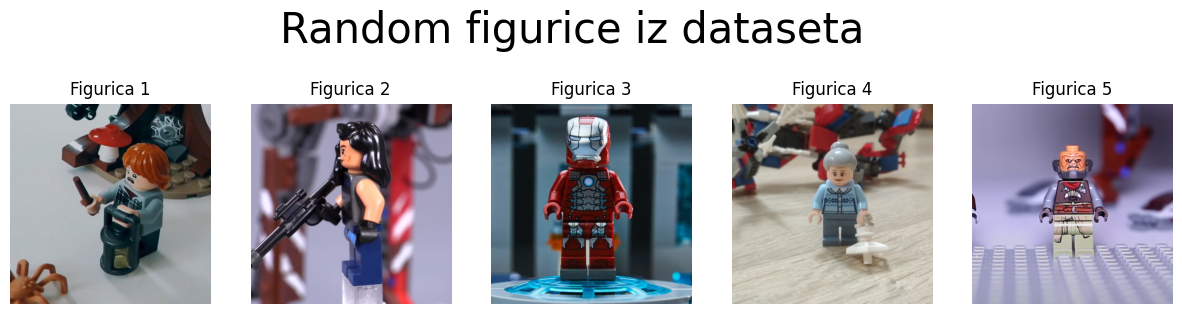

In [24]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = []
for root, dirs, files in os.walk("data"):
    for file in files:
        if file.endswith(".jpg"):
            image_paths.append(os.path.join(root, file))

plt.figure(figsize=(15, 4))
for i in range(5):
    img_path = random.choice(image_paths)
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Figurica {i+1}")
plt.suptitle("Random figurice iz dataseta", fontsize=30)

# **8. Obrada slika za potrebe GAN modela**
Pre nego što počnemo sa treniranjem GAN modela, slike je potrebno pripremiti u odgovarajućem formatu. GAN modeli, uključujući DCGAN koji ćemo koristiti, zahtevaju da sve ulazne slike imaju iste dimenzije i da su pikseli normalizovani.

U ovom koraku koristi se torchvision.transforms za definisanje niza transformacija:

**Normalize** – vrednosti piksela se prilagođavaju na opseg od -1 do 1, što je uobičajeno za treniranje GAN modela.

**ToTensor** – slike se konvertuju u tenzore, što su višedimenzionalni nizovi brojeva koje model može da obrađuje. Tenzori omogućavaju GAN-u da numerički „razume“ slike.

**Resize** – menja velicinu svake slike na 64x64 piksela,




Koristeći klasu **ImageFolder**, učitava se ceo dataset iz lokalnog foldera. Ova obrada osigurava da su slike u formatu spremnom za treniranje i direktno upotrebljive u GAN modelu.

In [6]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = datasets.ImageFolder("data", transform=transform)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# **9. Razvoj GAN arhitekture (DCGAN)**
GAN model se sastoji od dve neuronske mreže koje se treniraju istovremeno:

**Generator (G)** – generiše lažne slike koje treba da budu što sličnije pravim.

**Discriminator (D)** – procenjuje slike i pokušava da razlikuje prave od generisanih.

Ove dve mreže funkcionišu u suparničkom odnosu: generator nastoji da „prevari“ diskriminator, dok diskriminator konstantno unapređuje sposobnost da prepozna lažne slike. Upravo zbog ove međusobne borbe naziv modela glasi Generative Adversarial Network (suparnički generativni model).

Arhitektura koju ćemo koristiti je **DCGAN (Deep Convolutional GAN)**, koja koristi konvolucione slojeve pogodne za rad sa slikama. U narednom koraku prvo se definiše generator, a zatim diskriminator.

**GENERATOR**

Uloga Generatora je da na osnovu nasumičnih ulaza proizvodi nove, realistične slike.

Ulaz u model predstavlja vektor dimenzije 100, koji sadrži slučajne vrednosti i definiše tzv. latentni prostor.

Generator se sastoji od više slojeva koji postepeno povećavaju dimenzije ulaznog vektora dok se ne dobije slika veličine 64x64 piksela sa 3 kanala (RGB). Na kraju se primenjuje Tanh aktivaciona funkcija kako bi vrednosti piksela bile normalizovane u opseg od -1 do 1, što omogućava modelu pravilnu obradu.

Cilj Generatora je da nauči da iz slučajnog ulaza stvara slike koje vizuelno liče na one iz originalnog dataseta.

In [7]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, z_dim=100, img_channels=3, feature_g=64):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(

            nn.ConvTranspose2d(z_dim, feature_g * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(feature_g * 8),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 8, feature_g * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 4),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 4, feature_g * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g * 2),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g * 2, feature_g, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_g),
            nn.ReLU(True),

            nn.ConvTranspose2d(feature_g, img_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.gen(input)

**DISKRIMINATOR**

**Diskriminator** je deo GAN arhitekture zadužen za procenu da li je data slika „prava“ (iz dataseta) ili „lažna“ (generisana od strane Generatora). Njegova funkcija je da tokom treniranja pomaže Generatoru da proizvodi sve verodostojnije slike.

Mreža se sastoji od više konvolucionih slojeva (**Conv2d**) koji analiziraju slike kroz filtere, otkrivajući važne vizuelne karakteristike poput ivica, oblika i boja. Svaki sledeći sloj uči sve složenije detalje slike.

Posle svakog konvolucionog sloja primenjuje se LeakyReLU aktivaciona funkcija, koja za razliku od standardnog ReLU-a omogućava prolazak malog dela negativnih vrednosti. Ovo pomaže mreži da i u negativnim opsezima uči, smanjujući rizik da neki neuroni „prestanu da funkcionišu“.

**BatchNorm2d**, koji normalizuje izlaze slojeva, čineći trening stabilnijim i bržim, a ujedno pomaže svim neuronima da uče ravnomerno.

**Sigmoid** funkcija daje vrednost između 0 i 1, koja predstavlja verovatnoću da je slika autentična. Vrednosti blizu 1 označavaju da mreža smatra sliku pravom, dok vrednosti blizu 0 ukazuju da je generisana.

**Forward** metoda određuje način na koji Discriminator obrađuje ulazne slike. Svaka slika prolazi kroz sve prethodno definisane slojeve, a na kraju mreža vraća vrednost između 0 i 1, koja predstavlja verovatnoću da je slika autentična, odnosno da nije generisana.

In [8]:
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, img_channels=3, feature_d=64):

        super(Discriminator, self).__init__()

        self.disc = nn.Sequential( #redom izvršavaj sledeće:
            nn.Conv2d(img_channels, feature_d, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d, feature_d * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 2, feature_d * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 4),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 4, feature_d * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(feature_d * 8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(feature_d * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.disc(input)


**Inicijalizacija optimizatora i modela**

Pošto smo definisali arhitekture Generatora i Discriminatora, potrebna je njihova inicijalizacija i priprema svega što je neophodno za treniranje modela.

Pre početka treniranja određuju se osnovne vrednosti koje utiču na rad modela. Prvo se bira uređaj za izvršavanje – ako je dostupan GPU, koristi se zbog bržeg izvođenja, u suprotnom se koristi CPU. Takođe se postavljaju ključni hiperparametri, uključujući learning rate i dimenziju latentnog vektora z_dim, koji predstavlja nasumični ulaz iz kojeg Generator kreira slike.

Modeli Generatora i Discriminatora se inicijalizuju i premeštaju na odabrani uređaj, dok se funkcija greške (Binary Cross Entropy Loss) definiše za procenu performansi modela, odnosno za merenje uspešnosti Discriminatora u razlikovanju stvarnih od generisanih slika.

In [9]:
import torch
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 0.0002
z_dim = 100

gen = Generator(z_dim).to(device)
disc = Discriminator().to(device)

criterion = nn.BCELoss()


Za optimizaciju težina tokom treniranja oba modela koriste se Adam optimizatori. Oni omogućavaju brže i stabilnije učenje, poboljšavajući performanse GAN modela tokom iteracija.

In [10]:
opt_gen = optim.Adam(gen.parameters(), lr=lr, betas=(0.5, 0.999))
opt_disc = optim.Adam(disc.parameters(), lr=lr, betas=(0.5, 0.999))

# **10. Proces treniranja GAN modela**

Proces treniranja GAN-a odvija se kroz dve međusobno povezane faze koje se smenjuju u svakom koraku: treniranje Discriminatora i treniranje Generatora. Model prolazi kroz ceo skup podataka više puta, kroz unapred definisan broj epoha (300), što omogućava postepeno usavršavanje mreža.

U svakoj iteraciji prvo Generator stvara lažne slike koristeći slučajan latentni vektor kao ulaz. Diskriminator zatim procenjuje koliko uspešno prepoznaje stvarne slike iz dataseta i koliko je sposoban da otkrije generisane slike. Na osnovu rezultata izračunava se funkcija gubitka i prilagođavaju se težine Discriminatora.

Nakon toga, Generator se trenira sa ciljem da „prevari“ Discriminator, odnosno da proizvodi slike koje će diskriminator smatrati pravim. Gubitak Generatora meri koliko su njegove slike uverljive, a kroz ovaj međusobni proces obe mreže uče jedna od druge – Generator postaje sposoban da kreira sve realističnije slike, dok Discriminator postepeno poboljšava sposobnost razlikovanja.

Na kraju svake epohe beleže se vrednosti gubitka za oba modela (Loss D i Loss G), što omogućava praćenje napretka. Smanjenje Generatorovog gubitka signalizira da mreža sve bolje oponaša slike iz originalnog dataseta.

Tokom treniranja GAN modela, koristi se petlja koja prolazi kroz više epoha, a u ovom slučaju odabrano je 300 epoha. Jedna epoha predstavlja kompletan prolazak kroz ceo dataset, pri čemu se podaci obrađuju u manjim grupama, tzv. batch-evima. Prave slike iz batch-eva se prebacuju na uređaj za obradu, a zatim se beleži njihov broj.

Nakon toga se generiše latentni vektor, koji predstavlja nasumični šum i služi kao ulaz Generatoru. Generator na osnovu ovog šuma pokušava da proizvede novu sliku koja što vernije imitira stvarne podatke.

Sledeći korak je treniranje Diskriminatora. Prvo mu se prikazuju prave slike iz dataseta, a cilj je da ih prepozna kao „prave“ (vrednost blizu 1). Zatim mu se prikazuju lažne slike koje je napravio Generator, kako bi ih prepoznao kao „lažne“ (vrednost blizu 0). Na osnovu prosečne greške Diskriminatora ažuriraju se njegovi parametri, čime se postepeno poboljšava njegova sposobnost razlikovanja pravih i generisanih slika.

Nakon toga treniramo Generator, čiji cilj je da „prevari“ Diskriminator stvaranjem uverljivih slika. Evaluacija greške Generatora meri koliko Diskriminator smatra njegove slike pravim (vrednosti blizu 1), a na osnovu toga Generator prilagođava svoje parametre i postaje sve bolji u generisanju realističnih slika.

Na kraju svake epohe beleže se vrednosti greške za oba modela, što omogućava praćenje njihovog napretka i balansa. Cilj je da Generator postepeno postane sposoban da stvara sve uverljivije slike, dok Diskriminator uči da razlikuje stvarne od generisanih dok ne dostignu ravnotežu.

Zbog ograničenog broja slika u datasetu (494), treniranje je zahtevalo pažljiv pristup. Tokom eksperimentisanja testirano je više brojeva epoha: prvo 10 i 100, kako bi se pratila dinamika gubitka i kvaliteta slika, a zatim i duži treninzi od 200 i 500 epoha. Treniranjem na GPU-u omogućeno je brže izvršavanje i stabilnije učenje.

Analiza rezultata pokazala je da su najstabilniji i najrealističniji izlazi dobijeni nakon otprilike 300 epoha, zbog čega je odabrana ta vrednost za konačno treniranje.

In [13]:
import torch


epochs = 300

for epoch in range(epochs):
    for batch_idx, (real, _) in enumerate(dataloader):
        real = real.to(device)
        batch_size = real.size(0)


        noise = torch.randn(batch_size, z_dim, 1, 1).to(device)
        fake = gen(noise)


        disc_real = disc(real).view(-1)
        loss_real = criterion(disc_real, torch.ones_like(disc_real))

        disc_fake = disc(fake.detach()).view(-1)
        loss_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

        loss_disc = (loss_real + loss_fake) / 2
        disc.zero_grad()
        loss_disc.backward()
        opt_disc.step()


        output = disc(fake).view(-1)
        loss_gen = criterion(output, torch.ones_like(output))

        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()

    print(f"Epoch [{epoch+1}/{epochs}]  Loss D: {loss_disc:.4f}, Loss G: {loss_gen:.4f}")

Epoch [1/300]  Loss D: 0.4273, Loss G: 1.6877
Epoch [2/300]  Loss D: 0.2884, Loss G: 4.6355
Epoch [3/300]  Loss D: 0.1781, Loss G: 4.0109
Epoch [4/300]  Loss D: 0.1901, Loss G: 4.1602
Epoch [5/300]  Loss D: 0.2524, Loss G: 5.7309
Epoch [6/300]  Loss D: 0.2198, Loss G: 3.1391
Epoch [7/300]  Loss D: 0.2039, Loss G: 5.2122
Epoch [8/300]  Loss D: 0.6123, Loss G: 4.2025
Epoch [9/300]  Loss D: 0.1382, Loss G: 2.9768
Epoch [10/300]  Loss D: 0.4813, Loss G: 1.4262
Epoch [11/300]  Loss D: 0.2777, Loss G: 2.6899
Epoch [12/300]  Loss D: 0.1770, Loss G: 4.6997
Epoch [13/300]  Loss D: 0.1842, Loss G: 5.3787
Epoch [14/300]  Loss D: 0.1790, Loss G: 3.3648
Epoch [15/300]  Loss D: 0.1954, Loss G: 5.0478
Epoch [16/300]  Loss D: 0.2045, Loss G: 3.4175
Epoch [17/300]  Loss D: 0.1511, Loss G: 3.2965
Epoch [18/300]  Loss D: 0.1943, Loss G: 2.6847
Epoch [19/300]  Loss D: 0.1295, Loss G: 3.0746
Epoch [20/300]  Loss D: 0.1139, Loss G: 3.8297
Epoch [21/300]  Loss D: 0.4553, Loss G: 1.5361
Epoch [22/300]  Loss D

# **11. Evaluacija rezultata treniranja**

Tokom treniranja GAN modela na 300 epoha, vrednosti funkcija gubitka za Diskriminator (Loss D) i Generator (Loss G) pokazale su očekivanu dinamiku. U početnim epohama, Generator je beležio visoke vrednosti gubitka (Loss G), dok je Diskriminator relativno brzo smanjivao svoj gubitak, što je tipično za ranu fazu treniranja kada Diskriminator lako prepoznaje lažne slike.

Kako je treniranje napredovalo, vrednosti Loss G su postale stabilnije, pokazujući da Generator uči da kreira uverljivije slike. Povremene skokove gubitka (npr. epohe 33, 88, 184, 212, 267, 285) moguće je pripisati periodima učenja kada Generator pravi slike koje Diskriminator privremeno teže prepoznaje, što je normalno u GAN treniranju.

Diskriminator je, s druge strane, postepeno dostizao manji i stabilniji gubitak, što ukazuje na balans između Generatora i Diskriminatora. Nakon približno 200–250 epoha, oba modela su postigla relativnu stabilnost, sa Loss D uglavnom ispod 0.1–0.05, dok se Loss G kretao u rasponu od 5 do 7, što sugeriše da Generator proizvodi vizuelno prihvatljive, ali još uvek prepoznatljive lažne slike.

Zaključno, rezultati pokazuju da model uči pravilnu dinamiku igre između Generatora i Diskriminatora i da je nakon 300 epoha postignut stabilan balans, iako postoje povremeni oscilacije gubitka zbog inherentne nestabilnosti GAN arhitekture.

# **12. Generisanje i prikaz slika**

Za prikaz rezultata treniranja GAN modela koristi se funkcija show_generated_images, koja omogućava kreiranje određenog broja novih slika pomoću Generatora i njihovo organizovanje u mrežu za vizuelni pregled.

Za uspešno funkcionisanje modela i vizualizaciju rezultata korišćene su sledeće biblioteke:

**numpy** – služi za matematičke operacije i transformacije podataka, kao i pripremu slika za vizuelizaciju.

**matplotlib.pyplot** – koristi se za prikaz i crtanje generisanih slika u obliku mreže.

**torch** – omogućava rad sa tenzorima, definisanje i pokretanje modela, kao i generisanje slučajnog ulaza za Generator.





Na početku funkcije Generator se prebacuje u eval mod, što isključuje sve elemente koji se koriste isključivo tokom treniranja, kao što su normalizacija ili Dropout slojevi. Zatim se kreiraju nasumični latentni vektori, koji predstavljaju ulazni „šum“ za Generator. Na osnovu ovog ulaza Generator proizvodi slike koje pokušavaju da što verodostojnije oponašaju originalne podatke.

Generisane slike se potom prilagođavaju skaliranjem vrednosti piksela iz opsega [-1, 1] u [0, 1], kako bi se pravilno prikazale. Sve slike se raspoređuju u kvadratnu mrežu 5x5 i vizualizuju se koristeći matplotlib.

Ova funkcija je posebno korisna jer omogućava brz i pregledan uvid u to šta je model naučio, pokazujući koliko su generisane slike vizuelno uverljive.

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def show_generated_images(generator, num_images=25):
    generator.eval()
    noise = torch.randn(num_images, z_dim, 1, 1).to(device)
    with torch.no_grad():
        fake_images = generator(noise).detach().cpu()

    grid_size = int(np.sqrt(num_images))
    fig, axs = plt.subplots(grid_size, grid_size, figsize=(6,6))
    idx = 0
    for i in range(grid_size):
        for j in range(grid_size):
            img = fake_images[idx]
            img = img * 0.5 + 0.5
            axs[i, j].imshow(np.transpose(img.numpy(), (1, 2, 0)))
            axs[i, j].axis('off')
            idx += 1
    plt.tight_layout()
    plt.show()


Pozivanjem naredne funkcije prikazuju nam se sledeće slike:

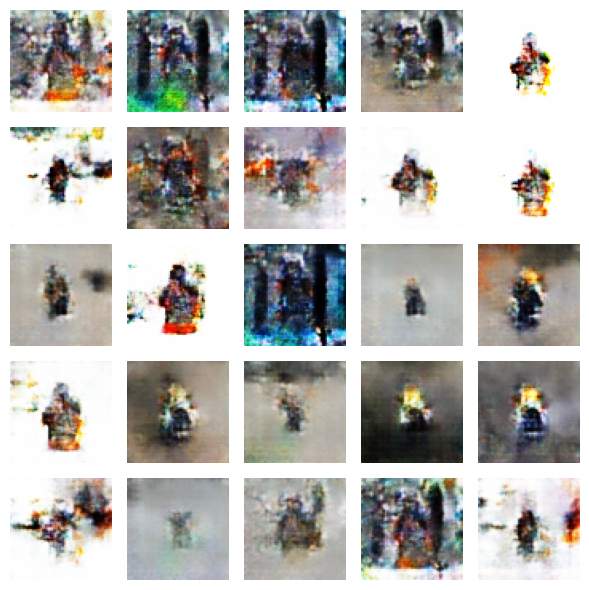

In [28]:
show_generated_images(gen)

**Prikaz ukupnog broja slika u datasetu:**




In [29]:
import os

def count_images(root_dir):
    count = 0
    for root, dirs, files in os.walk(root_dir):
        for f in files:
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                count += 1
    return count

print("Broj slika u datasetu:", count_images("data"))


Broj slika u datasetu: 494


# **13. Analiza rezultata**

Analizom generisanih slika može se zaključiti da je model uspeo da nauči osnovne karakteristike LEGO figura, poput oblika, pozicije i raspodele boja. Ipak, dobijene slike i dalje imaju nizak kvalitet – figure su prepoznatljive, ali su mutne, sa nejasnim konturama, vizuelnim šumom i neprirodnim bojama.

Glavni faktori koji utiču na ovaj rezultat su:

Ograničen broj slika u datasetu (494), što otežava treniranje GAN modela.

Loš kvalitet originalnih slika, koje su često mutne, sa slabim osvetljenjem i vizuelnim smetnjama, što komplikuje učenje stabilnih obrazaca.

Velika raznovrsnost unutar dataseta, uključujući različite figure i pozadine, što otežava modelu da uspostavi konzistentne karakteristike.

Iako je rezolucija smanjena na 64×64 piksela kako bi treniranje bilo stabilnije, količina i kvalitet podataka nisu bili dovoljni za postizanje realističnog izgleda generisanih figura. I pored postojećih ograničenja, model pokazuje značajan potencijal. Sa većim i kvalitetnijim uzorkom slika, pažljivijom pripremom podataka i produženim treniranjem, mogu se dobiti bolji rezultati.

# **14. Zaključak**
Tokom ovog projekta uspešno je implementiran GAN model za generisanje slika LEGO figura, što je omogućilo praktično razumevanje rada generatora i diskriminatora, pripreme dataseta i treniranja modela. Projekat je bio veoma koristan za učenje o složenosti GAN arhitekture, radu sa PyTorch-om i evaluaciji rezultata kroz vizuelizaciju i praćenje funkcija gubitka.

Iako generisane slike još uvek nisu potpuno realistične zbog ograničenog broja i kvaliteta slika, ovaj rad je pružio značajno iskustvo u radu sa generativnim modelima i jasno pokazao faktore koji utiču na kvalitet rezultata, što predstavlja dobru osnovu za dalja unapređenja i eksperimentisanja.

# **15. Spisak korišćene literature**

1. TensorFlow. Deep Convolutional Generative Adversarial Network (DCGAN). TensorFlow Tutorials - https://www.tensorflow.org/tutorials/generative/dcgan


2. Real Python. Generative Adversarial Networks: Build Your First Models. Real Python -
https://realpython.com/generative-adversarial-networks/



3. Learning PyTorch with Examples - https://docs.pytorch.org/tutorials/beginner/pytorch_with_examples.html


4. GeeksForGeeks - Generative Adversarial Networks (GANs) in PyTorch - https://www.geeksforgeeks.org/deep-learning/generative-adversarial-networks-gans-in-pytorch/